In [271]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [272]:

duration = 1

In [273]:
k_B =  1.380649e-23 / 8.6173E-11 #J/MeV
E_fus = 17.6 #MeV
aplph = 7.2973525693e-3
r_e = 2.81794092e-15
m_e = 9.10938215e-31
c = 3*1e8
Z_eff = 2
T = 1e-6
n_e = 2e18
n_T = n_e/2
V = 1
n = n_e*2
T_0 = 1e-9
a = 1.5*n*k_B*V
b = 0.2*n_T*n_T* 1.1* 10e-24*E_fus*V
c = 8.5*aplph* r_e*r_e* m_e*c**3*Z_eff*Z_eff*n_e*n_e *np.sqrt(k_B/(m_e*c*c))*V 
P = 3e3
Tau = 1

In [274]:
print(a)
print(b)
print(c)


961309.6909704896
38720000000000.0
270.96363541045883


In [275]:
def ENERGY_TEMP(T, t, a, b, c, P, Tau):
    dT_dt = P/a + (b/a)*T*T - np.sqrt(T) * c/a - T/Tau
    return dT_dt


In [276]:
def Integrator(duration, T_0, a,b,c,P):
    Time = np.linspace(0,duration, int(100000))
    Temp = scipy.integrate.odeint(ENERGY_TEMP, T_0, Time, args=(a,b,c,P, Tau), full_output=0)
    return Time, Temp

In [277]:
Time, Temp = Integrator(duration, T_0, a,b,c,P )

C:\Users\virdg\AppData\Local\Temp\ipykernel_23220\195177650.py:3: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  Temp = scipy.integrate.odeint(ENERGY_TEMP, T_0, Time, args=(a,b,c,P, Tau), full_output=0)


In [278]:
print(Time)
Temp = (Temp)
print(Temp)

[0.00000e+00 1.00001e-05 2.00002e-05 ... 9.99980e-01 9.99990e-01
 1.00000e+00]
[[1.00000000e-09]
 [3.22074045e-08]
 [6.34157266e-08]
 ...
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]]


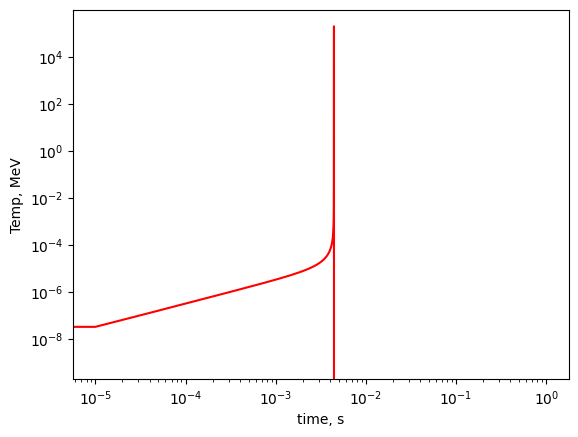

In [279]:
plt.plot(Time, Temp, color="r", label = "Test")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("time, s")
plt.ylabel("Temp, MeV")
plt.show()